# Demo of endpoint donor_distribution (part 1)

Run the module "main.py" from the base project directory with program arguments: "server <db_user> <db_password>" after replacing <db_user> and <db_password> with appropriate values.

Prepare the request paramters by selecting the individuals located in the South Asian continent having regions aligned on assembly hg19, and query how they're distributed by gender, country of origin (population) and source of the sample (dna_source).

In [1]:
import json
param = {
    'distribute_by': [
        'gender',
        'dna_source',
        'population'
    ],
    'meta': {
        'health_status': "true",
        'super_population': ['SAS'],
        'assembly': 'hg19'
    }
}
body = json.dumps(param)
print(body)

{"distribute_by": ["gender", "dna_source", "population"], "meta": {"health_status": "true", "super_population": ["SAS"], "assembly": "hg19"}}


POST the endpoint \donor_distribution with the prepared JSON parameter

In [4]:
import requests

r = requests.post('http://127.0.0.1:5000/donor_distribution', json=param)
print(' response status code: {}'.format(r.status_code))
response_body = r.json()

response status code: 200


# Inspect response data:
It's a data cube with the numerosity of the individuals grouped on the free-dimensions: gender, dna_source and population (to be intended as country of origin)

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
columns = response_body['columns']
rows = response_body['rows']
df = pd.DataFrame.from_records(rows, columns=columns)

# clean data: removes rows with dna_source = '' beacuse they're wrong; replaces None with ''
df.drop(df[df.DNA_SOURCE == ''].index, inplace=True)
df.fillna(value='', inplace=True)

df

,GENDER,DNA_SOURCE,POPULATION,count_1
0,,,,494
2,male,blood,STU,53
3,female,blood,PJL,48
4,female,blood,STU,45
5,male,blood,ITU,59
7,male,lcl,BEB,42
8,male,lcl,GIH,8
9,female,lcl,BEB,44
10,female,lcl,GIH,1
11,female,lcl,STU,3


Total count of individuals

In [9]:
total = df.query('POPULATION == "" & DNA_SOURCE == "" & GENDER == ""')['count_1'].iloc[0]
print(total)

494


Distribution of samples across different regions of the SAS continent

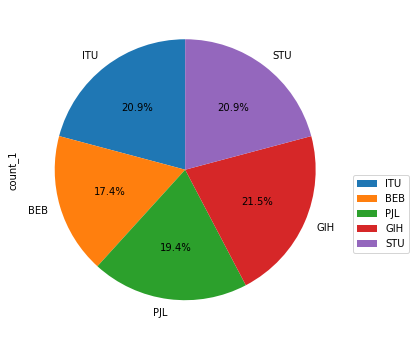

In [10]:
# to see the number of individuals in each population, we prepare an ad-hoc data structure, obtained by removing unnecessary columnms and rows form the original data source.
# unnecessary columns are gender and dna_source. Unnecessary rows, are all that ones in which dna_source or gender are != ''
df1 = df.drop(df.query('GENDER != "" | DNA_SOURCE != "" | POPULATION == ""').index)    
columns_to_drop = ['GENDER', 'DNA_SOURCE']
df1.drop(columns_to_drop, inplace=True, axis=1) # removes columns

pie = df1.plot(
    kind='pie',
    y='count_1', 
    labels=df1['POPULATION'].tolist(),
    figsize=(6, 6),
    startangle=90, 
    autopct='%1.1f%%'
)
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Distribution of individuals by gender and population

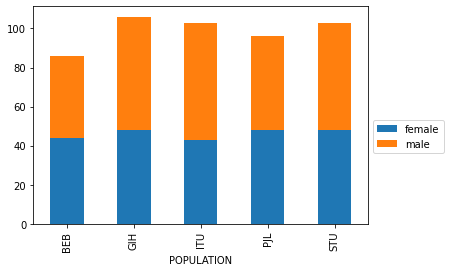

In [11]:
# prepare data frame
df2 = df.drop(df.query('GENDER == "" | POPULATION == "" | DNA_SOURCE != ""').index)    
df2.drop(['DNA_SOURCE'], inplace=True, axis=1)

df2_pivot = df2.pivot(index='POPULATION', columns='GENDER', values='count_1') # creates a df with populations as index of rows, genders as columns, n° samples as cell values
df2_pivot.plot( # automatically uses the values of index as x-axis and stacks the values of columns
    kind='bar',
    stacked=True,
    figsize=(6, 4),
)

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

The plots show that inside the SAS super-population, there's a substantially equal distribution of samples between males and females and between different populations. Open the notebook donor_distribution_part_2 to observe an example of diversification inside the same sample set.